In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import torch

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = 'Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [3]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

y1, sr1 = librosa.load(f'{general_path}/genres_original/blues/blues.00036.wav')
audio_file1, _ = librosa.effects.trim(y1)

y2, sr2 = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
audio_file2, _ = librosa.effects.trim(y1)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [4]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


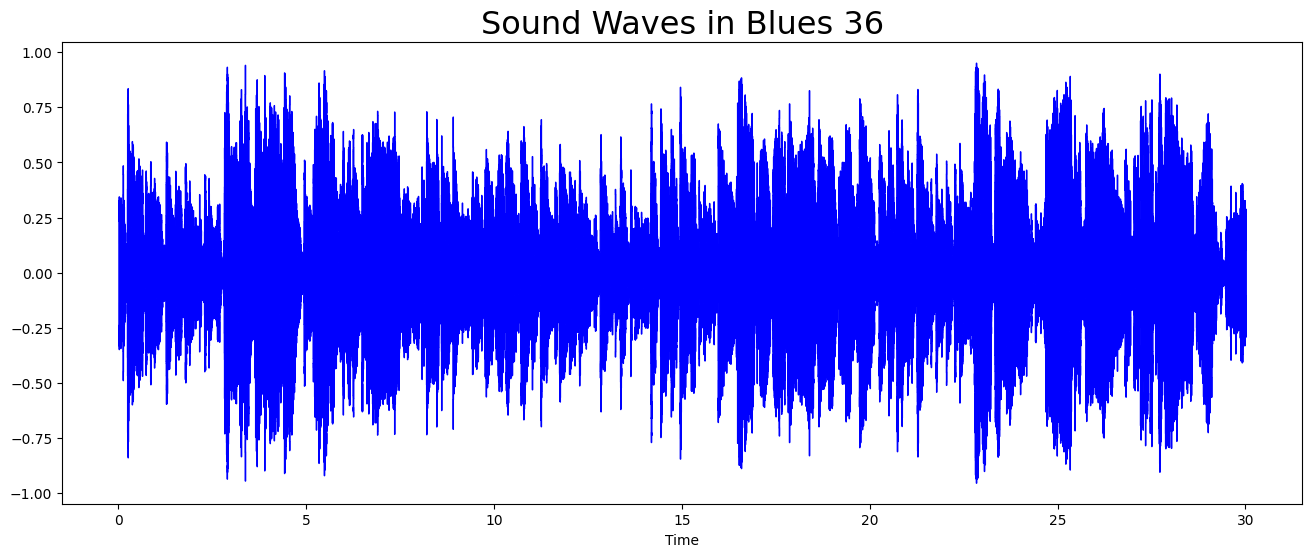

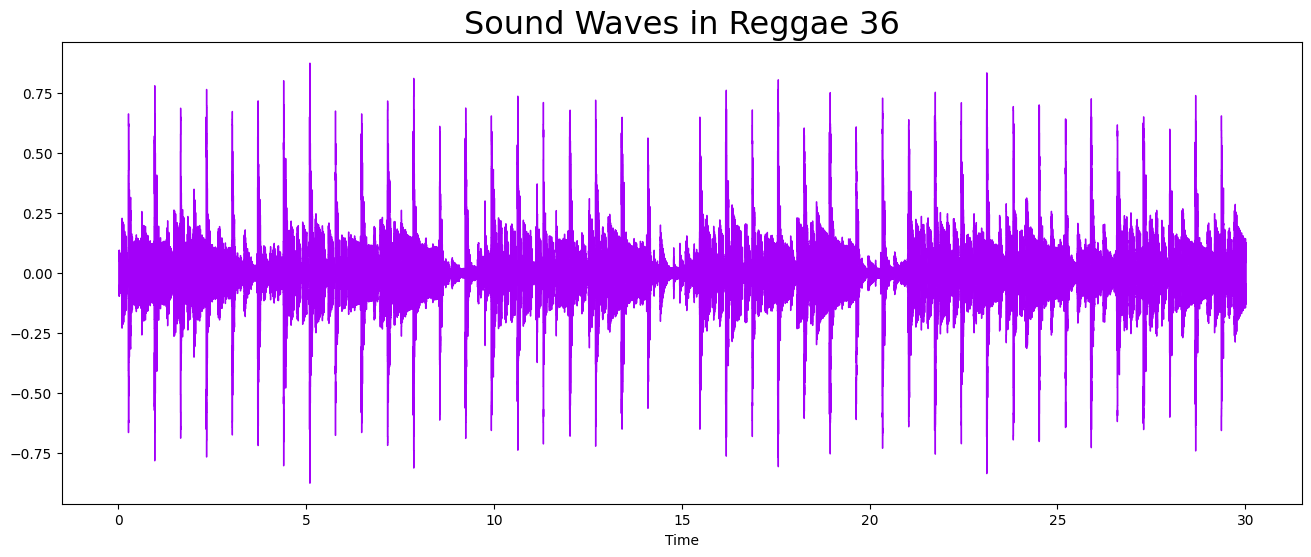

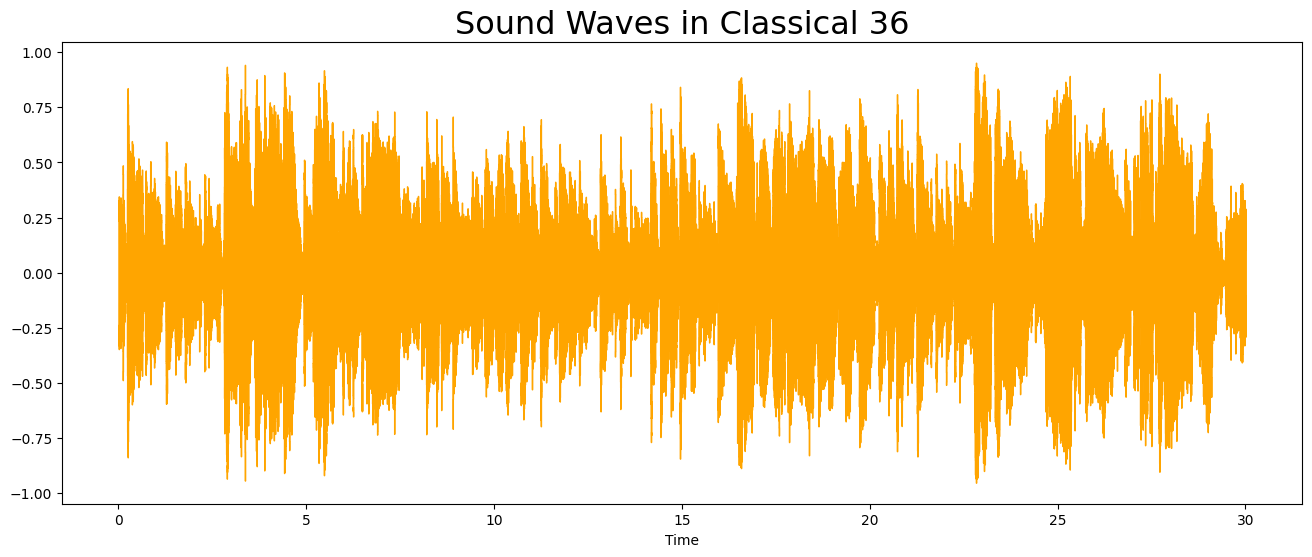

In [5]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file1, sr=sr1, color="blue")
plt.title("Sound Waves in Blues 36", fontsize=23)
plt.show()

plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, color="#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize=23)
plt.show()

plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file2, sr=sr2, color="orange")
plt.title("Sound Waves in Classical 36", fontsize=23)
plt.show()

In [6]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number of audio frames between STFT columns (looks like a good default)

# librosa.stft is a function in the Librosa library that performs Short-Time Fourier Transform (STFT) on an audio signal. 
# STFT is a widely used technique in signal processing and audio analysis to transform a time-domain signal into the frequency domain, revealing the frequency content of the signal over time.
# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


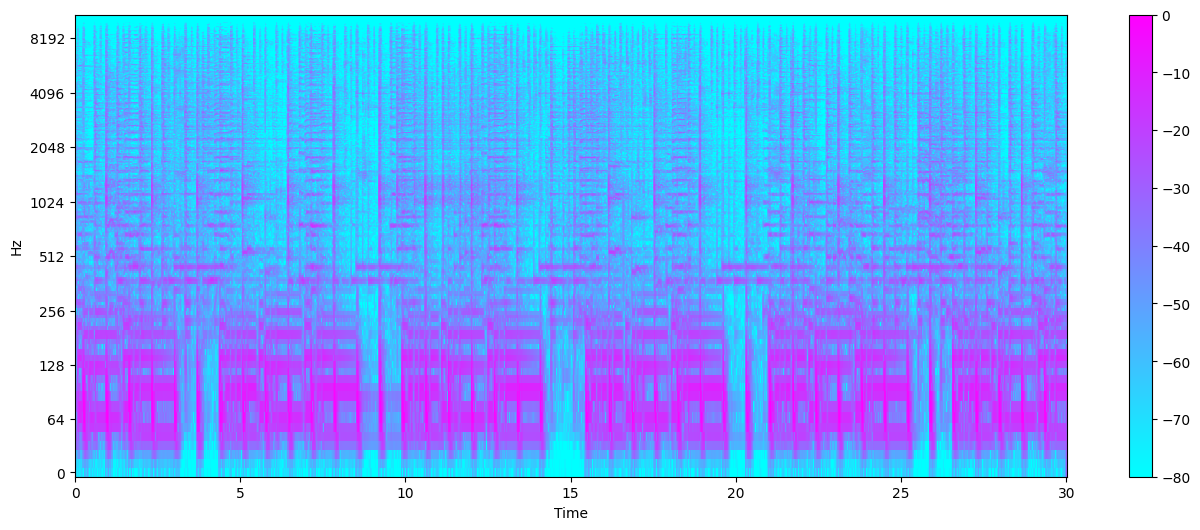

In [7]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

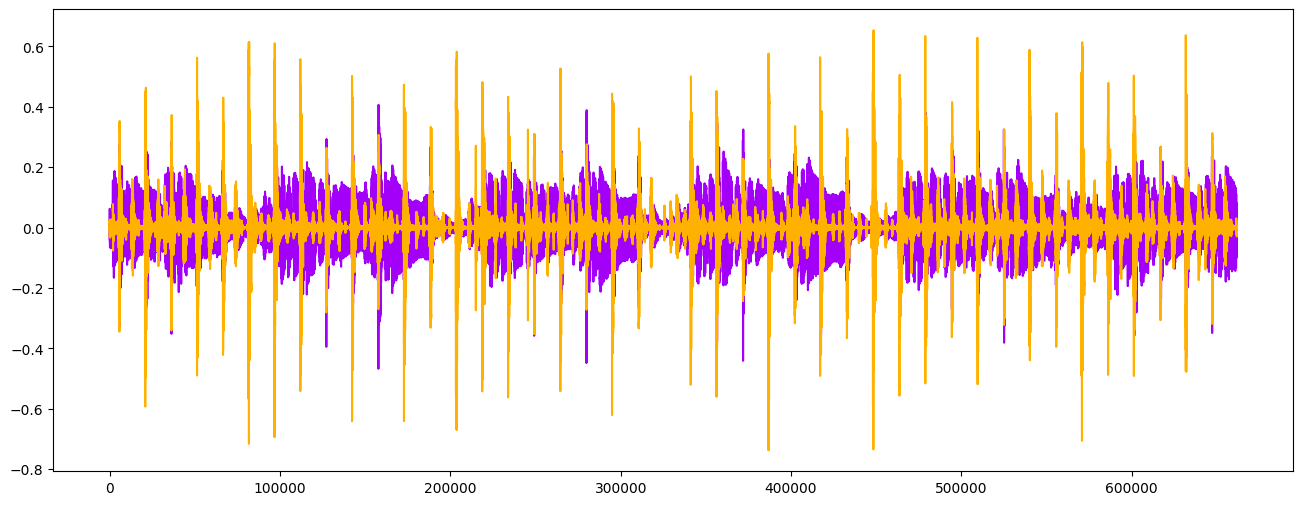

In [8]:
# harmonic: np.ndarray [shape=(n,)] - Harmonic component of the input signal.
# percussive: np.ndarray [shape=(n,)] - Percussive component of the input signal.
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [9]:
data30 = pd.read_csv(f'{general_path}/features_30_sec.csv')

validata_filenames = data30.iloc[::100, data30.columns=='filename'][:9]
# print(validata_filenames)

data30 = data30.iloc[:, 1:]
data30.head()

print(data30.columns)

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

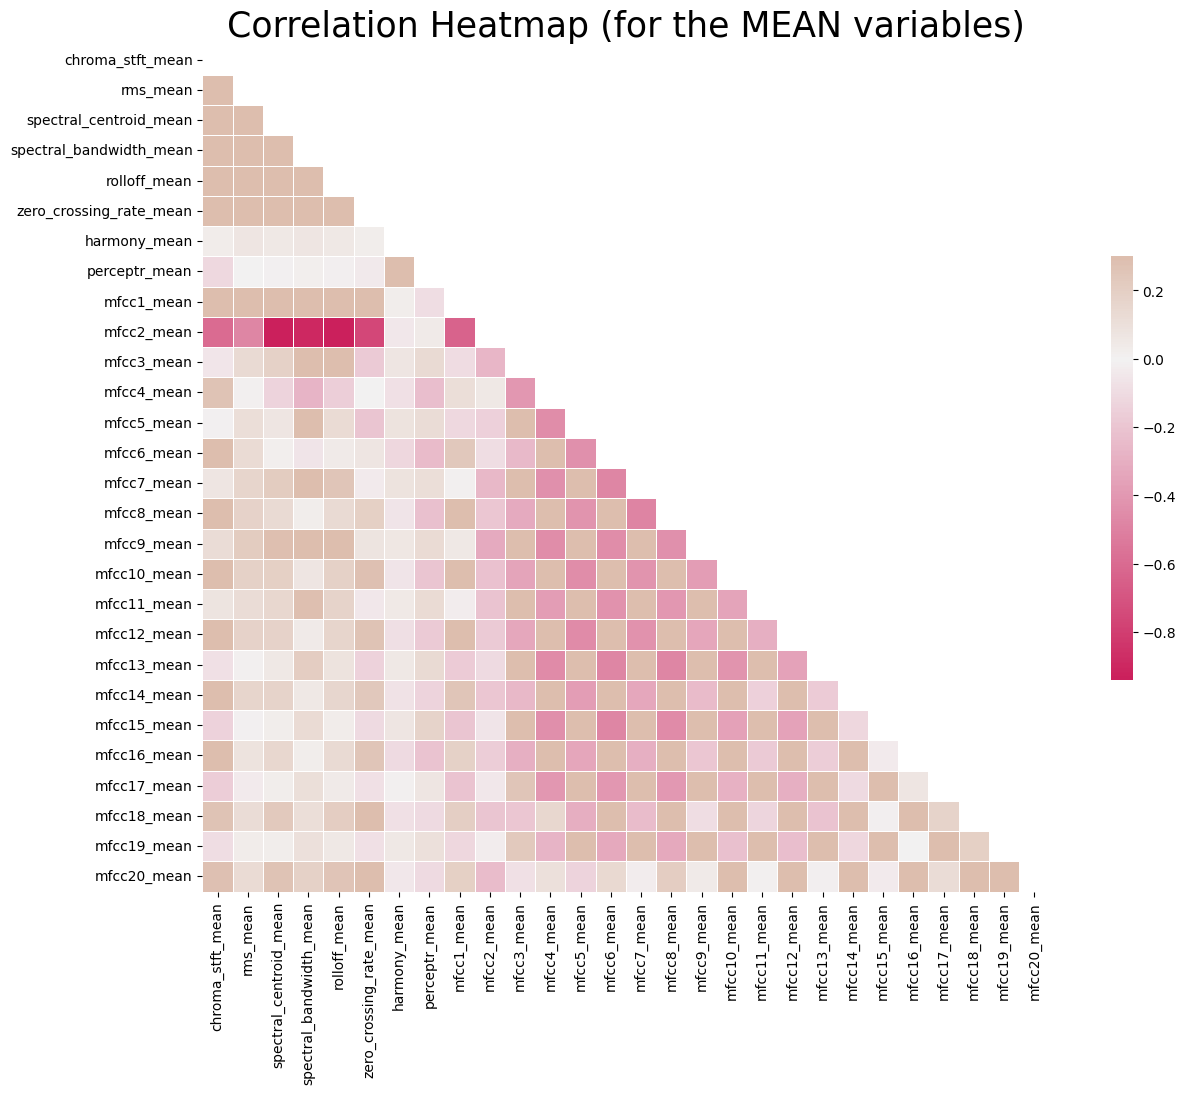

In [10]:
def compute_correlation_matrix(data, column_filter, save_path=None):
    # Select columns based on the filter
    spike_cols = [col for col in data.columns if column_filter in col]
    
    # Compute the correlation matrix
    corr_matrix = data[spike_cols].corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 11))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    plt.title(f'Correlation Heatmap (for the {column_filter.upper()} variables)', fontsize=25)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()
    
    return corr_matrix

correlation_matrix = compute_correlation_matrix(data30, 'mean', save_path="Corr_Heatmap.jpg")

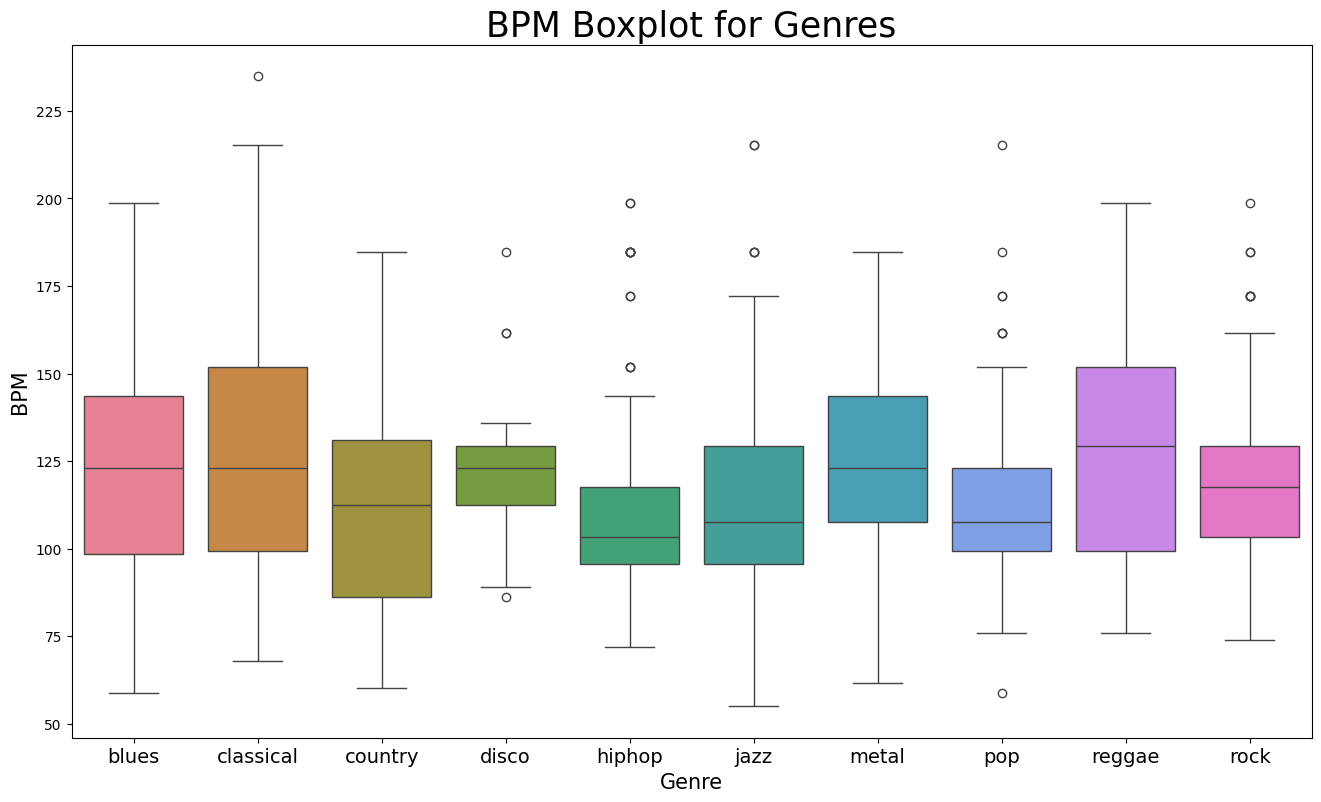

In [11]:
x = data30[["label", "tempo"]]

# This function simplifies the process of creating multiple subplots within the same figure.
f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [13]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[:, 1:]
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [14]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(data['label'])
X = data.loc[:, data.columns != 'label']

# Normalize X and save the scaler for later use on validation data
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validation Data (using the same scaler fitted on the training data)
data_validate = data30.iloc[::100, data30.columns != 'label'][:9]
result_validate = data30.iloc[::100, -1][:9]
data_validate = pd.DataFrame(min_max_scaler.transform(data_validate), columns=data_validate.columns)

In [15]:
original_labels = label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9])

index_label_dict = {i: label for i, label in enumerate(original_labels)}

print(index_label_dict)

{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [16]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=20)
model_assess(knn, "KNN")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

Accuracy KNN : 0.82282 

Accuracy Cross Gradient Booster : 0.91842 



Accuracy : 0.91842 



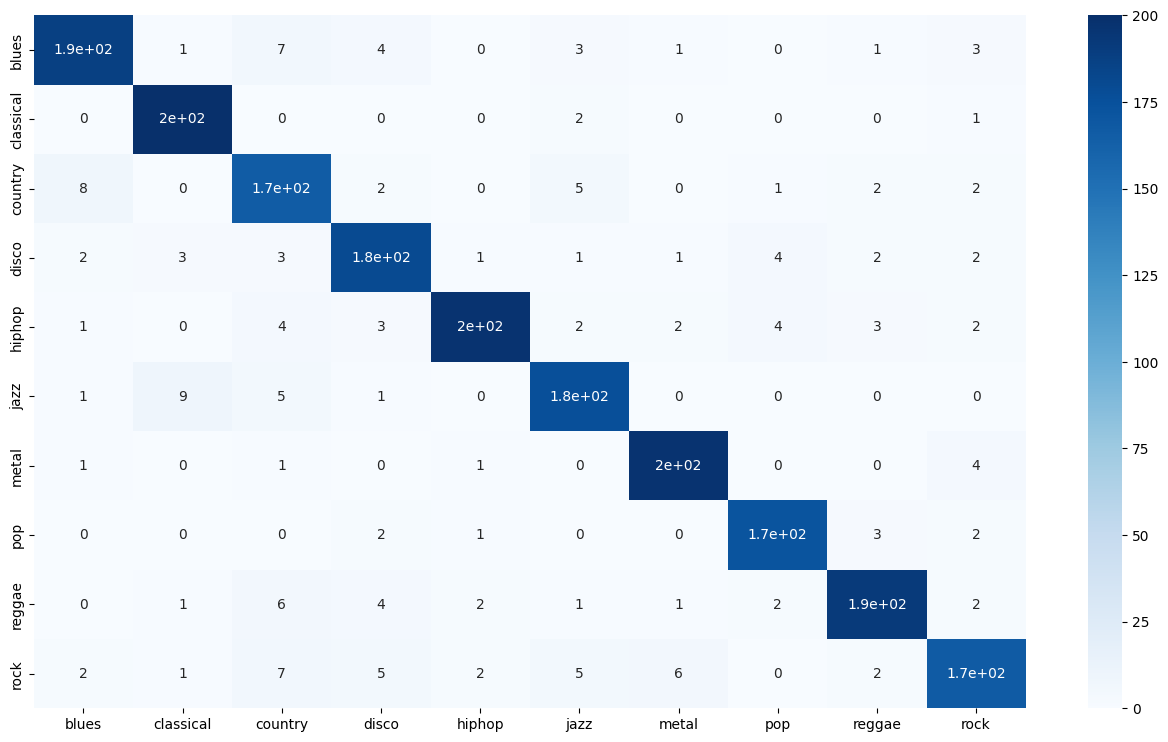

In [18]:
# Final model
# xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [19]:
print("------------Label Dictionary-----------")
print(index_label_dict)
print("-----------Validation Labels-----------")
print(result_validate)
print("------------Predicted Values-----------")
xgb.predict(data_validate)

------------Label Dictionary-----------
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
-----------Validation Labels-----------
0          blues
100    classical
200      country
300        disco
400       hiphop
500         jazz
600        metal
700          pop
800       reggae
Name: label, dtype: object
------------Predicted Values-----------


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

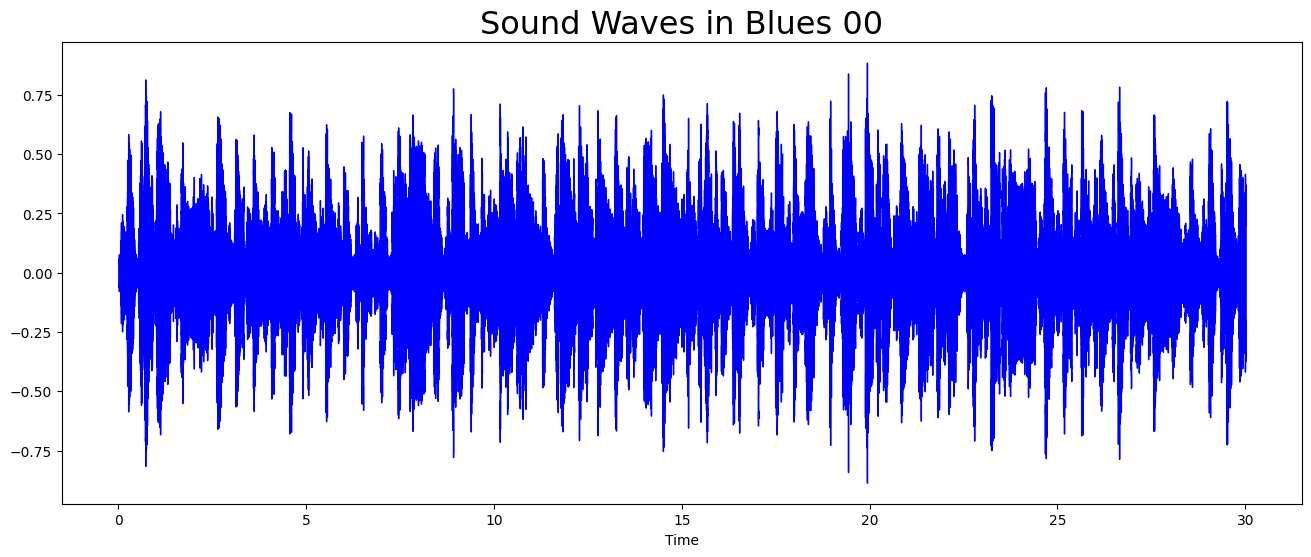

In [20]:
y1, sr1 = librosa.load(f'{general_path}/genres_original/blues/{validata_filenames.iloc[0,0]}')
audio_file1, _ = librosa.effects.trim(y1)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file1, sr=sr1, color="blue")
plt.title("Sound Waves in Blues 00", fontsize=23)
plt.show()

# y1, sr1 = librosa.load(f'{general_path}/genres_original/reggae/{validata_filenames.iloc[8,0]}')
# audio_file1, _ = librosa.effects.trim(y1)
# plt.figure(figsize=(16, 6))
# librosa.display.waveshow(y=audio_file1, sr=sr1, color="#A300F9")
# plt.title("Sound Waves in Reggae 00", fontsize=23)
# plt.show()